<a href="https://colab.research.google.com/github/seungbok3240/DeepLearning/blob/master/Binaryclassification_2020_02_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유방암 데이터 세트 불러오기

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 데이터 확인하기

입력 데이터 확인하기

In [2]:
cancer.data.shape

(569, 30)

In [3]:
cancer.target.shape

(569,)

처음 3개의 샘플 출력

In [4]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

그래프를 위한 패키지 선언

In [0]:
import matplotlib.pyplot as plt
import numpy as np

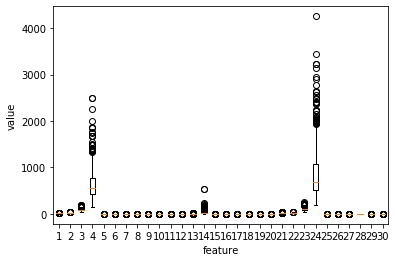

In [6]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

다른 특성보다 값의 분포가 큰 4,14,24번쨰 특성을 확인

In [7]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

타깃 데이터 확인하기<br>
numpy의 unique()를 사용하면 고유한 값을 찾아 반환합니다.<br>
return_counts 매개변수를 True로 지정하면 고유한 값을 카운팅합니다.

In [8]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

0과 1이 각각 212번 357번 나온다는 것을 알 수 있습니다.

# 훈련 데이터 세트 저장하기

In [0]:
x = cancer.data
y = cancer.target

훈련 세트와 테스트 세트로 나누기

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size = 0.2, random_state=42)

train_test_split()는 훈련 세트 75% 테스트 세트 25% 비율로 나눠줍니다.<br>
- stratify=y : stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만듭니다. train_test_split()은 기본적으로 데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형한 경우에는 stratify를 y로 지정해야 합니다.
- test_size = 0.2 : 훈련 세트 80% 테스트 세트 20%로 사용자가 지정합니다.
- random_state = 42 : train_test_split()은 무작위로 데이터 세트를 섞은 다음 나눕니다. 섞은 다음 나눈 결과가 항상 일정하도록 random_state를 난수 초깃값 42로 지정해줍니다.

In [12]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


# 로지스틱 회귀 구현

In [0]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self,x,err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self,x,y,epochs=100):
    self.w = np.ones(x.shape[1])  #가중치 초기화  
    self.b = 0  #절편 초기화
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)
        a = self.activation(z)  #활성화 함수 적용
        err = -(y_i - a)  #오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  #역방향
        self.w -= w_grad  #가중치 업데이트
        self.b -= b_grad  #절편 업데이트

  def activation(self, z):  #시그모이드 함수
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

# 만든 모델 훈련시키기

In [15]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


In [16]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


0.8245614035087719

82%의 정확성을 확인할 수 있습니다.